<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Regresion_logistica_banca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESIÓN LOGÍSTICA PARA BANCA

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO UDEMY/Repositorio de Curso UDEMY/bank/bank.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [89]:
data.shape

(4119, 21)

In [90]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [91]:
data['Venta'] = np.where(data['y'] == 'yes',1,0)

In [92]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [93]:
data['education'] = np.where(data['education'] == 'basic.4y',"Basic",data['education'])
data['education'] = np.where(data['education'] == 'basic.6y',"Basic",data['education'])
data['education'] = np.where(data['education'] == 'basic.9y',"Basic",data['education'])
data['education'] = np.where(data['education'] == 'high.school',"High School",data['education'])
data['education'] = np.where(data['education'] == 'university.degree',"University Degree",data['education'])
data['education'] = np.where(data['education'] == 'professional.course',"Professional Course",data['education'])
data['education'] = np.where(data['education'] == 'illiterate',"Illiterate",data['education'])
data['education'] = np.where(data['education'] == 'unknown',"Unknown",data['education'])

In [94]:
data['Venta'].value_counts()

0    3668
1     451
Name: Venta, dtype: int64

In [96]:
data = data.drop(columns='y', axis = 1)

In [97]:
data.groupby('Venta').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
Venta,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [98]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Venta
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


<Figure size 720x360 with 0 Axes>

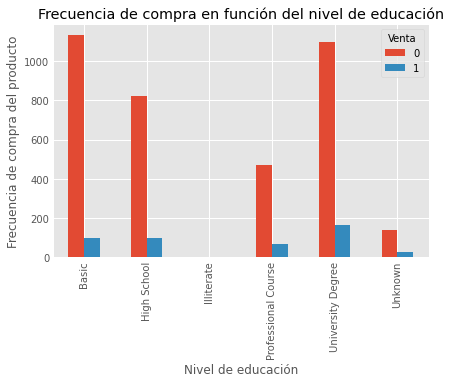

In [99]:
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
pd.crosstab(data.education,data.Venta).plot(kind = "bar")
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra del producto')
plt.show()

<Figure size 360x360 with 0 Axes>

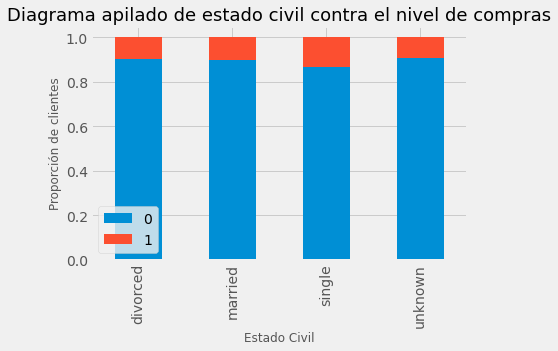

In [100]:
#'classic'
#'fivethirtyeight'
#'ggplot'
#'tableau-colorblind10'
#'seaborn'
plt.style.use('fivethirtyeight')
table = pd.crosstab(data.marital,data.Venta)
plt.figure(figsize = (5,5))
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras", fontsize = 18)
plt.xlabel('Estado Civil', fontsize = 12)
plt.ylabel('Proporción de clientes', fontsize = 12)
plt.legend(loc = 'best')
plt.show()

Conversión de las variables categóricas a dummies

In [101]:
categories = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

In [102]:
for category in categories:
  cat_list = 'cat' +'_'+category
  cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
  data_new = data.join(cat_dummies)
  data = data_new

In [103]:
len(data.columns)

69

In [104]:
data_vars = data.columns.values.tolist()
len(data_vars)

69

In [105]:
to_keep = [v for v in data_vars if v not in categories]

In [118]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'Venta', 'cat_job_admin.', 'cat_job_blue-collar',
       'cat_job_entrepreneur', 'cat_job_housemaid', 'cat_job_management',
       'cat_job_retired', 'cat_job_self-employed', 'cat_job_services',
       'cat_job_student', 'cat_job_technician', 'cat_job_unemployed',
       'cat_job_unknown', 'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat_month_aug', 'cat_month_dec', 'cat_month

In [119]:
bank_data = bank_data.drop(columns = 'default', axis = 1)

In [120]:
# Matriz característica
bank_data_vars = bank_data.columns.values.tolist()
Y = ['Venta']
X = [v for v in bank_data_vars if v not in Y]

In [121]:
### Selección de rasgos para el modelo
n = 12 # Número de variables

In [122]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [123]:
lr = LogisticRegression() # Alias del modelo

In [125]:
rfe = RFE(lr,n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())
print(rfe.support_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [126]:
print(rfe.ranking_)

[41 39 18 45  1 17 26 22  1 35  2  8  5 38  7  1  6 24 43  1  1 40 15 28
 27 47 31 12 46 19 30  4  9 14 44 13 20 33 11  3 37 21  1  1  1  1  1 23
 32 42 34 25 29 36 10  1 16  1]


In [131]:
# zip
z = zip(bank_data, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 41),
 ('duration', False, 39),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 35),
 ('Venta', False, 2),
 ('cat_job_admin.', False, 8),
 ('cat_job_blue-collar', False, 5),
 ('cat_job_entrepreneur', False, 38),
 ('cat_job_housemaid', False, 7),
 ('cat_job_management', True, 1),
 ('cat_job_retired', False, 6),
 ('cat_job_self-employed', False, 24),
 ('cat_job_services', False, 43),
 ('cat_job_student', True, 1),
 ('cat_job_technician', True, 1),
 ('cat_job_unemployed', False, 40),
 ('cat_job_unknown', False, 15),
 ('cat_marital_divorced', False, 28),
 ('cat_marital_married', False, 27),
 ('cat_marital_single', False, 47),
 ('cat_marital_unknown', False, 31),
 ('cat_education_Basic', False, 12),
 ('cat_education_High School', False, 46),
 ('cat_education_Illiterate', False, 19),
 ('cat_education_Professional

In [150]:
variables = []
# recorriendo el zip
for tupla in zip(bank_data, rfe.support_, rfe.ranking_):
  if tupla[1] == True:
    variables.append(tupla[0])
    
print(variables)

['previous', 'euribor3m', 'cat_job_management', 'cat_job_student', 'cat_job_technician', 'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat_month_jun', 'cat_month_mar', 'cat_day_of_week_wed', 'cat_poutcome_nonexistent']


In [152]:
X = bank_data[variables]
Y = bank_data['Venta']

Implementación del modelo con statsmodel.api

In [153]:
import statsmodels.api as sm

In [154]:
logit_model = sm.Logit(Y, X) # Función Logit: to create a logistic regression 

In [155]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293712
         Iterations 7


In [160]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Venta   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.1498
Time:                        17:03:12   Log-Likelihood:                -1209.8
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 1.627e-84
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
previous                    -0.1107      0.070     -1.590      0.112      -0.247       0.026
euribor3m                   -0.6072      0.037    -16.376      0.000      -0.680      -0.535
cat_job_management          -0.2794      0.217     -1.289      0.197      -0.704       0.145
cat_job_student             -0.2113      0.296     -0.715      0.475      -0.791       0.368
cat_job_technician           0.0413      0.145      0.284      0.776      -0.244       0.326
cat_month_aug                0.6548      0.170      3.857      0.000       0.322       0.988
cat_month_dec                1.1841      0.447      2.647      0.008       0.307       2.061
cat_month_jul                0.9980      0.183      5.441      0.000       0.639       1.358
cat_month_jun                1.0455      0.169      6.170      0.000       0.713       1.378
cat_month_mar                1.6392      0.315      5.203      0.000       1.022       2.257
cat_day_of_week_wed         -0.0805      0.138     -0.582      0.561      -0.352       0.191
cat_poutcome_nonexistent    -0.7908      0.122     -6.494      0.000      -1.029      -0.552
============================================================================================
"""

Implementación del modelo en Python con scikit-learn

In [161]:
from sklearn import linear_model

In [166]:
logit_model = linear_model.LogisticRegression()
resultados = logit_model.fit(X,Y)

In [165]:
logit_model.score(X,Y) # Factor R2

0.8975479485311969

In [171]:
# Imprimir resultados
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5684844155558533]
1,euribor3m,[-0.5403161259912292]
2,cat_job_management,[-0.25141258925533694]
3,cat_job_student,[0.025064403016522133]
4,cat_job_technician,[0.15440993133124772]
5,cat_month_aug,[0.6227852146675302]
6,cat_month_dec,[1.234140902613054]
7,cat_month_jul,[0.8908965125370487]
8,cat_month_jun,[0.9937896073977969]
9,cat_month_mar,[1.5997457206555419]


### **Validación del modelo logístico**

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [176]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
probs = lm.predict_proba(X_test) # Nos predice la probabilidad del conjunto de test

In [180]:
probs
# Nivel de confianza  Prob de compra > 0.05 "Compra"

array([[0.93857871, 0.06142129],
       [0.864772  , 0.135228  ],
       [0.93549095, 0.06450905],
       ...,
       [0.69836607, 0.30163393],
       [0.96892884, 0.03107116],
       [0.55053276, 0.44946724]])

In [190]:
prediction = lm.predict(X_test)

In [198]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] > threshold,1,0)
prob_df['prediction'].value_counts()

0    846
1    390
Name: prediction, dtype: int64

In [199]:
from sklearn import metrics

In [200]:
metrics.accuracy_score(Y_test,prediction)

0.9004854368932039

**Validación cruzada**

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
#crros_val_score
# cv = cross validation number -> K
scores = cross_val_score(linear_model.LogisticRegression(),X,Y, scoring = "accuracy", cv = 10) 
scores

array([0.90533981, 0.88834951, 0.90533981, 0.88834951, 0.90048544,
       0.90291262, 0.88349515, 0.89320388, 0.8907767 , 0.89294404])

In [203]:
scores.mean()

0.8951196466113908

### **MATRICES DE CONFUSIÓN**

1.   Número positivos reales: TP + FN
2.   Número de negativos reales: TN + FP
3.   Número de predicciones correctas: TP + TN
4.   Número de predicciones incorrectas: FP + FN

*   Sensibilidad(TPR) = TP/(TP + FN)
*   Especificidad(TNR) = TN/(TN + FP)


In [204]:
# División de conjuntos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [210]:
# Elección del modelo
modelo = linear_model.LogisticRegression()

In [211]:
#Ajustar el modelo
modelo.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
#Validación del modelo
# 1.- Nivel de confianza  Prob de ocurrencia > 0.05
probs = modelo.predict_proba(X_test)

In [217]:
# Obtención de probabilidad 
prob = probs[:,1]
# Formación de conjunto de datos predictivos
prob_df = pd.DataFrame(prob)
# Elección de umbral
threshold = 0.1
# Modificación de registros
prob_df['prediction'] = np.where(prob_df[0] >= threshold, 1,0)
prob_df['actual'] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.061421,0,0
1,0.135228,1,0
2,0.064509,0,0
3,0.057720,0,0
4,0.038740,0,0


In [220]:
confusion_matrix = pd.crosstab(prob_df['prediction'], prob_df['actual'])
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [246]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]  
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

In [247]:
sensibilidad = TP/(TP+FN)
sensibilidad

0.3770491803278688

In [249]:
especificidad_1 = TN/(TN + FP)
1 - especificidad_1

0.06463195691202872

In [257]:

# Elección múltiples umbrales
threshold = [0.05,0.08,0.1,0.15,0.18,0.20,0.25,0.3,0.4,0.5]
sensibilidad = [1]
especificidad_1 = [1]
# Modificación de registros

for i in threshold:
  prob_df['prediction'] = np.where(prob_df[0] >= i, 1,0)
  prob_df['actual'] = list(Y_test)
  confusion_matrix = pd.crosstab(prob_df['prediction'], prob_df['actual'])
  TN = confusion_matrix[0][0]
  TP = confusion_matrix[1][1]  
  FP = confusion_matrix[0][1]
  FN = confusion_matrix[1][0]
  sensibilidad.append(TP/(TP+FN))
  especificidad_1.append(1 - TN/(TN + FP))

sensibilidad.append(0)
especificidad_1.append(0)
print(sensibilidad)
print(especificidad_1)


[1, 0.8360655737704918, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.5245901639344263, 0.4262295081967213, 0.3770491803278688, 0.3360655737704918, 0.13934426229508196, 0.09016393442622951, 0]
[1, 0.5987432675044884, 0.2782764811490126, 0.2764811490125674, 0.25583482944344704, 0.14901256732495516, 0.09605026929982041, 0.06463195691202872, 0.06193895870736088, 0.022441651705565557, 0.010771992818671472, 0]


In [258]:
curva_roc_df = pd.DataFrame({'x': especificidad_1,
                             'y': sensibilidad
})

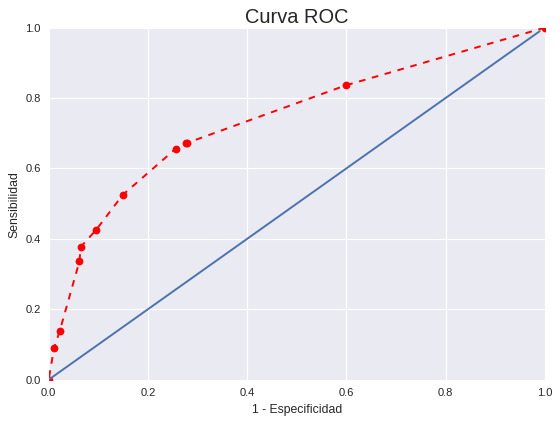

In [265]:
plt.style.use('seaborn')
plt.plot(especificidad_1, sensibilidad, marker = 'o', ls = '--', color = 'r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.title('Curva ROC', fontsize = 18)
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.show()

In [280]:
espec_1,sensit,_ = metrics.roc_curve(Y_test,prob) # Hace divisiones de longitud 0.01